---
layout: default
title: "Neural Networks - Applications"
categories: neuralNetwork
permalink: /ML14/
order: 14
comments: true
---

In [1]:
%pylab --no-import-all inline
import pandas as pd
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# How neural networks build complex non-linear functions
In this section we will explain how a neural network can build relatively complex non-linear functions.

Let's take a non-linear classification example like that depicted below, where panel A is just a simplified version of panel B.

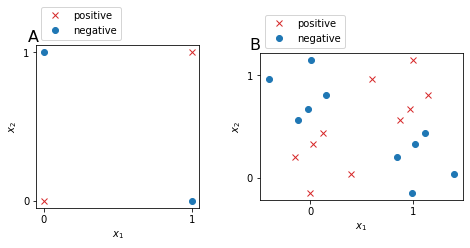

In [2]:
x1x2=np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax1, ax2 = axes
p = x1x2[:2]
n = x1x2[2:]
ax1.plot(*p.T, ls='none', marker='x', c='C3', label='positive')
ax1.plot(*n.T, ls='none', marker='o', c='C0', label='negative')
pp = np.repeat(p, [5, 5], 0)
nn = np.repeat(n, [5, 5], 0)
jitter = np.random.rand(5, 2)
jitter = np.r_[jitter, 1-jitter] - .5
ax2.plot(*(pp + jitter).T, ls='none', marker='x', c='C3', label='positive')
ax2.plot(*(nn + jitter[::-1]).T, ls='none', marker='o', c='C0', label='negative')

for ax, lbl in zip(axes, ['A', 'B']):
    ax.text(-0.05, 1, lbl, transform=ax.transAxes,
      fontsize=16, va='bottom')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect(1)
    ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

This is a non-linear classification example modeled by the logical XNOR function

$$
\begin{align}
&x_1 \; \text{XNOR} \; x_2 \\
&\text{NOT} \; (x_1 \; \text{XOR} \; x_2)
\end{align}
$$


## Logical AND function
Let's look at a neural network that can calculate the logical $\text{AND}$ function.

$$
\begin{align}
&x_1,x_2\in \lbrace 0,1 \rbrace\\
&y= x_1 \wedge x_2\\
&\Theta^{(1)} = 
\begin{bmatrix}-30\\20\\20\end{bmatrix}
\end{align}
$$

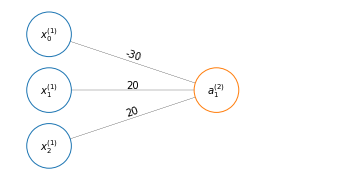

In [9]:
elabels = [-30, 20, 20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, edge_labels=elabels, height=.5, radius=2, edge_label_spacing=0, bias=True)
ax.set_aspect('equal')

So that 

$$
\begin{equation}
h_\Theta(x) = g(-30+20x_1+20x_2)
\end{equation}
\label{eq:h} \tag{1}
$$

Since the sigmoid activation function $g(z)$ is

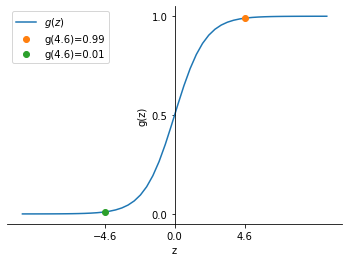

In [4]:
fig, ax = plt.subplots()
z = np.linspace(-10,10)
sigmoid = lambda z: 1/(1+np.e**-z)
ax.plot(z, sigmoid(z), label='$g(z)$')
ax.plot(4.6, sigmoid(4.6), ls='none', marker='o', label=f"g(4.6)={sigmoid(4.6):.2f}")
ax.plot(-4.6, sigmoid(-4.6), ls='none', marker='o', label=f"g(4.6)={sigmoid(-4.6):.2f}")
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
ax.set_yticks([0, .5, 1])
ax.set_xticks([-4.6, 0, 4.6])
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The the output of $\eqref{eq:h}$ is

In [5]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -30 + 20*s[0] + 20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(-30) \approx 0$
0,1,$g(-10) \approx 0$
1,0,$g(-10) \approx 0$
1,1,$g(10) \approx 1$


Which is exactly the $x_1 \wedge x_2$.

## Logical OR function
The following network and table show instead $x_1 \vee x_2$

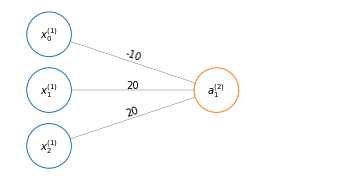

In [34]:
elabels = [-10, 20, 20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

$$h_\Theta(x) = g(-10+20x_1+20x_2)$$

In [13]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -10 + 20*s[0] + 20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(-10) \approx 0$
0,1,$g(10) \approx 1$
1,0,$g(10) \approx 1$
1,1,$g(30) \approx 1$


## Logical NOT function

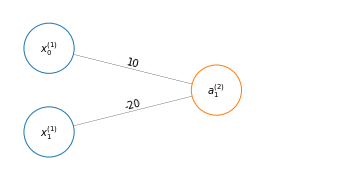

In [32]:
elabels = [10, -20]
ax, *_ = ann([2, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

In [15]:
x1=[0, 1]
df = pd.DataFrame(x1, columns=['$x_1$'])
h = lambda s: 10 -20*s
f = lambda z: f"$g({z[0]}) \\approx {sigmoid(z)[0]:.0f}$"
df["$h_\Theta(x)$"] = df.apply(h, 1).apply(f, 1)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$h_\Theta(x)$
0,$g(10) \approx 1$
1,$g(-10) \approx 0$


## Logical NOT-1 AND NOT-2 function

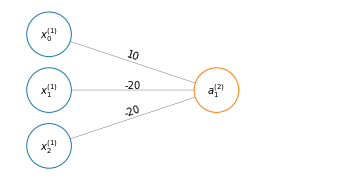

In [31]:
elabels = [10, -20, -20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

In [22]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: f'$g({z}) \\approx {sigmoid(z):.0f}$' 
df["$h_\\Theta(x)$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$h_\Theta(x)$
0,0,$g(10) \approx 1$
0,1,$g(-10) \approx 0$
1,0,$g(-10) \approx 0$
1,1,$g(-30) \approx 0$


## Logical XNOR function

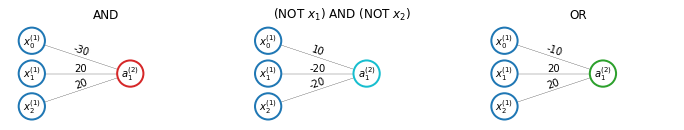

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes

base = ['C0']*3
# AND
ax1.set_title('AND')
ann([3, 1], node_colors=base+['C3'], node_labels=True, radius=2, ax=ax1, node_lw=2, bias=True,
                edge_labels=[-30, 20, 20], width=2, edge_label_spacing=0)
ax.set_aspect('equal')

# NOT1 AND NOT2
ax2.set_title('(NOT $x_1$) AND (NOT $x_2$)')
ann([3, 1], node_colors=base+['C9'], node_labels=True, radius=2, ax=ax2, node_lw=2, bias=True,
                edge_labels=[10, -20, -20], width=2, edge_label_spacing=0)

# OR
ax3.set_title('OR')
ann([3, 1], node_colors=base+['C2'], node_labels=True, radius=2, ax=ax3, node_lw=2, bias=True,
                edge_labels=[-10, 20, 20], width=2, edge_label_spacing=0)

for ax in axes:
    ax.set_aspect('equal')

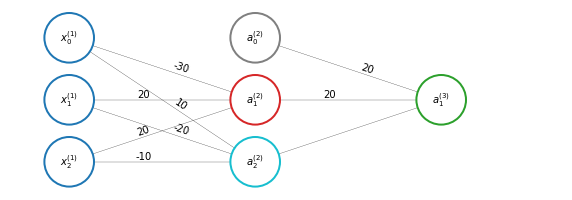

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
colors=['C0'] * 3 + ['C3', 'C9', 'C2']
nodelabels=["+1", "$x_1$", "$x_2$", "$a_1^{(2)}$", "$a_2^{(2)}$", "$a_1^{(3)}$"]
theta = [-30, 10, 20, -20, 20, -10, 20, 20, '', -10]
ax, *_ = ann([3, 3, 1], node_colors=base+['grey', 'C3', 'C9', 'C2'], node_labels=True, radius=2, node_lw=2, bias=True, 
    edge_labels=theta, width=3, edge_label_spacing=1, ax=ax)

ax.set_aspect('equal');

In [48]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
a12 = lambda s: -30 + 20*s[0] + 20*s[1]
a22 = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: np.round(sigmoid(z)).astype(int)
df["$a_1^{(2)}$"] = df.apply(a12, 1).apply(f)
df["$a_2^{(2)}$"] = df.apply(a22, 1).apply(f)
a13 = lambda s: -10 + 20*s[2] + 20*s[3]
df["$h_\\Theta(x)$"] = df.apply(a13, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$a_1^{(2)}$,$a_2^{(2)}$,$h_\Theta(x)$
0,0,0,1,1
0,1,0,0,0
1,0,0,0,0
1,1,1,0,1


# Neural network multi-class classification
Multiclass classification in neural network is an extension of the on vs all method. Let's say that we want to build an image processing algorithm that can distinguish between four class of vehicles. We will build a neural network with 4 output units, each of which will model one of the output classes $C$

$$
h\Theta(x) = \begin{bmatrix}
P(y_1 \mid x, \Theta) \\
P(y_2 \mid x, \Theta) \\
P(y_3 \mid x, \Theta)\\
P(y_4 \mid x, \Theta)
\end{bmatrix}
$$

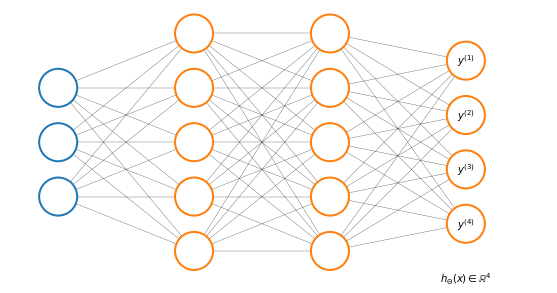

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
layerlabels=['']*3+['$h_\\Theta(x) \in \mathbb{R}^4$']
nodelabels = ['']*13+['$y^{(1)}$', '$y^{(2)}$', "$y^{(3)}$", '$y^{(4)}$']
ann([3, 5, 5, 4], node_colors=True, node_lw=2, ax=ax, width=2, radius=2,
               layer_labels=layerlabels, node_labels=nodelabels)
ax.set_aspect('equal');

So that $h^{(i)}_\Theta(x)$ can be one of the following

$$h^{(i)}_\Theta(x) \approx \begin{bmatrix}1\\0\\0\\0\end{bmatrix} \;, \;  \begin{bmatrix}0\\1\\0\\0\end{bmatrix} \;, \;  \begin{bmatrix}0\\0\\1\\0\end{bmatrix}
\;, \;  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}$$
